In [420]:
from numpy.linalg import inv

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [442]:
from scipy.stats import chi2

In [497]:
from matplotlib.patches import Ellipse

In [2]:
X = np.random.randn(100)
X.sort()

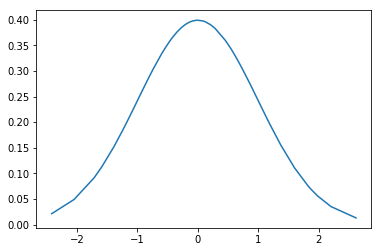

In [22]:
y = stats.norm(0, 1)
plt.plot(X, y.pdf(X))
plt.show()

In [32]:
_ = -1.9599639845400545

In [29]:
x = np.arange(-3, 3, .1)

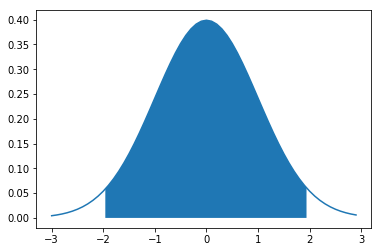

In [33]:
x = np.arange(-3, 3, .1)
plt.plot(x, y.pdf(x))

x = np.arange(_, -_, .1)
plt.fill_between(x, 0, y.pdf(x))

plt.show()

In [36]:
X = np.random.multivariate_normal([0,0], [[1,0], [0,1]], 100)

In [38]:
y = stats.multivariate_normal([0,0], [[1,0], [0,1]])

In [45]:
xs, ys = np.mgrid[-3:3:.1, -3:3:.1]
xy = np.concatenate([xs.ravel().reshape(-1, 1), ys.ravel().reshape(-1, 1)], axis=1)
xy

array([[-3. , -3. ],
       [-3. , -2.9],
       [-3. , -2.8],
       ..., 
       [ 2.9,  2.7],
       [ 2.9,  2.8],
       [ 2.9,  2.9]])

In [48]:
mu  = np.array([0, 0])
sig =  np.array([[1,0], [0, 1]])

In [52]:
y.pdf([0, 0])

0.15915494309189535

In [57]:
(pdf(1) - pdf(-1))/2

0.682689492137086

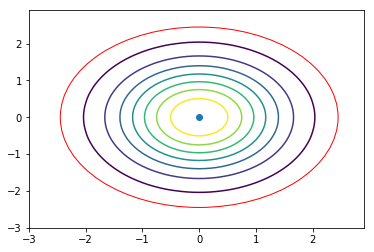

In [301]:
ax = plt.subplot(111)
ell = Ellipse([0,0], 2*np.sqrt(5.991), 2*np.sqrt(5.991), angle=0, color='red')
ell.set_facecolor('none')
ax.add_artist(ell)

plt.contour(xs, ys, np.reshape(y.pdf(xy), xs.shape))

plt.scatter([0], [0])

plt.show()

In [72]:
from matplotlib.patches import Ellipse
from scipy.linalg import eig

In [77]:
vals, vec = eig(sig)
print vals
vec

[ 8.4213+0.j  0.9387+0.j]


array([[ 1.,  0.],
       [ 0.,  1.]])

In [58]:
mu  = np.array([0, 0])
sig =  np.array([[8.4213,0], [0, 0.9387]])

In [67]:
x = np.random.multivariate_normal(mu, sig, 300)

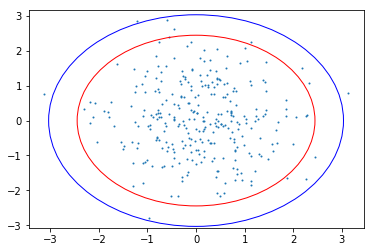

In [362]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.random.multivariate_normal(mu, [[1,0], [0,1]], 300)
plt.scatter(x.T[0], x.T[1], s=1)

w = np.sqrt(5.991)*2
h = np.sqrt(5.991)*2

ell = Ellipse(xy=mu, width=w, height=h, angle=0, color='red')
ell.set_facecolor('none')
ax.add_artist(ell)

w = np.sqrt(9.21)*2
h = np.sqrt(9.21)*2
ell = Ellipse(xy=mu, width=w, height=h, angle=0, color='blue')
ell.set_facecolor('none')
ax.add_artist(ell)

plt.show()

In [370]:
mu  = np.array([0, 0])
sig =  np.array([[8.4213, 3.5], [.5, 0.9387]])
x = np.random.multivariate_normal(mu, sig, 1000)

In [413]:
x[369]

array([ 7.19286   ,  1.39228515])

In [424]:
np.where(x > 7 )[0]

array([ 31, 369, 397, 472], dtype=int64)

In [425]:
point = x[369].reshape(1, -1)
print point.dot(inv(sig)).dot(point.T) ** .5

point = x[31].reshape(1, -1)
print point.dot(inv(sig)).dot(point.T) ** .5

point = x[472].reshape(1, -1)
print point.dot(inv(sig)).dot(point.T) ** .5

point = x[397].reshape(1, -1)
print point.dot(inv(sig)).dot(point.T) ** .5

[[ 3.07916193]]
[[ 2.73562693]]
[[ 3.84664117]]
[[ 2.70099072]]


[ 8.75100079+0.j  0.62893530+0.j]
[-0.38780941  0.92173958]
22.8182631065


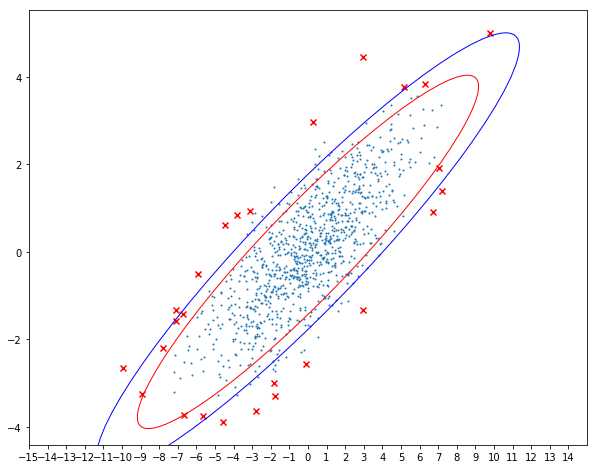

In [496]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

plt.scatter(x.T[0], x.T[1], s=1)

sig = np.cov(x.T)
vals, vecs = eig(sig)
vals, vecs = sort_eigens(vals, vecs)
print vals
print vecs.T[:,0][::-1]

theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
print theta

w = np.sqrt(sig[0,0]*chi2.ppf(.95, 2)*np.real(vals[0]))
h = np.sqrt(sig[1,1]*chi2.ppf(.95, 2)*np.real(vals[1]))
ell = Ellipse(xy=mu, width=w, height=h, angle=theta, color='red')
ell.set_facecolor('none')
ax.add_artist(ell)

w = np.sqrt(sig[0,0]*chi2.ppf(.99, 2)*np.real(vals[0]))
h = np.sqrt(sig[1,1]*chi2.ppf(.99, 2)*np.real(vals[1]))
ell = Ellipse(xy=mu, width=w, height=h, angle=theta, color='blue')
ell.set_facecolor('none')
ax.add_artist(ell)

for x_ in x:
    x_ = x_.reshape(1, -1)
    if x_.dot(inv(sig)).dot(x_.T)**.5 > t:
        plt.scatter(x_[0,0], x_[0,1], marker='x', c='r')

plt.xlim(-15, 15)
plt.xticks(np.arange(-15, 15, 1))

plt.show()

In [471]:
md = []
for _ in x:
    _ = _.reshape(1, -1)
    md.append(_.dot(inv(sig)).dot(_.T)**.5)
md = np.array(md).reshape(1, -1)

In [472]:
md.sort()

In [484]:
len(md[0])

1000

In [494]:
t = chi2.ppf(.975, 2) ** .5

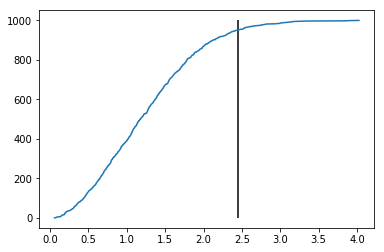

In [492]:
ar = np.arange(0, len(md[0]))
plt.plot(md[0], ar)
plt.vlines(t, 0, 1000)
plt.show()

In [58]:
mu  = np.array([0, 0])
sig =  np.array([[8.4213,0], [0, 0.9387]])

In [67]:
x = np.random.multivariate_normal(mu, sig, 300)

In [342]:
np.cov(x.T)

array([[ 8.54249124,  3.39501347],
       [ 3.39501347,  2.16419421]])

In [303]:
def sort_eigens(w, v):
    """
    Sort the eigenvalues & eigenvectors decreasing order.
    
    Parameters
    ----------
    w : numpy.ndarray
        Vector with the eigenvalues.
    v : numpy.ndarray
        Matrix with the eigenvectors.
    """
    temp = {_:(w[_], v[:,_]) for _ in range(len(w))}
    w = []
    v = []
    
    for _ in sorted(temp.items(), key=lambda x:x[1][0], reverse=True):
        w.append(_[1][0])
        v.append(_[1][1])
    w = np.array(w)
    v = np.array(v).T
    
    return w, v

In [289]:
np.arctan2(vecs[:, 0][1], vecs[:, 0][0])

-1.5043682483936356

In [346]:
val, vec = np.linalg.eigh(sig)
print val
print vec

[ 0.64876066  9.13336305]
[[ 0.40323779 -0.91509523]
 [-0.91509523 -0.40323779]]


In [305]:
val, vec = sort_eigens(val, vec)
print val
print vec

[ 8.45456298  0.90543702]
[[-0.99779447  0.06637923]
 [-0.06637923 -0.99779447]]


In [316]:
val, rvec, lvec = eig(sig, left=True)

In [318]:
val
print rvec
print lvec

[[ 0.91056032 -0.06471833]
 [ 0.41337621  0.99790357]]
[[ 0.99790357 -0.41337621]
 [ 0.06471833  0.91056032]]
